In [ ]:
#from google.colab import drive

#drive.mount("/content/gdrive")
#!pwd

#%cd "/content/gdrive/MyDrive/7mo SEM/Workshops/Reto"
#!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/7mo SEM/Workshops/Reto
/content/gdrive/MyDrive/7mo SEM/Workshops/Reto
 DATA_CATALOG_2024.xlsx   DATOS_VENTA_2024.xlsx  'Elasticidad fabricante.ipynb'


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

dc = pd.read_excel('DATA_CATALOG_2024.xlsx')
dc.columns = ["ID","FAB","PRODUCT","CATEGORY", "SUBCATEGORY","TYPE"]
display(dc.head())

dv = pd.read_excel('DATOS_VENTA_2024.xlsx')
dv.columns = ["CORTE","ID","AÑO","MES", "FECHA","VALOR","UNIDADES","VOLUMEN"]
display(dv.head())

FileNotFoundError: [Errno 2] No such file or directory: 'DATA_CATALOG_2024.xlsx'

In [ ]:
from os import replace
dv.drop(columns=['CORTE', 'AÑO','MES','VOLUMEN'],axis=1 ,inplace = True)
dv.head()

,ID,FECHA,VALOR,UNIDADES
0,981005567,2020-01-01,2.026034e+06,18396
1,265754,2020-01-01,6.228272e+05,6346
2,980017513,2020-01-01,2.768399e+05,2805
3,981008733,2020-01-01,5.709468e+06,43632
4,980015450,2020-01-01,2.539604e+04,227


In [ ]:
dc_reducido = dc[['ID', 'FAB']]
df= pd.merge(dv, dc_reducido, on='ID', how='left')
df['FECHA'] = pd.to_datetime(df['FECHA'])
df.head()

,ID,FECHA,VALOR,UNIDADES,FAB
0,981005567,2020-01-01,2.026034e+06,18396,FAB60
1,265754,2020-01-01,6.228272e+05,6346,FAB14
2,980017513,2020-01-01,2.768399e+05,2805,FAB60
3,981008733,2020-01-01,5.709468e+06,43632,FAB52
4,980015450,2020-01-01,2.539604e+04,227,FAB27


In [ ]:
product_stats = df.groupby('FAB')[['UNIDADES', 'VALOR']].agg(['count', 'mean', 'std', 'min', 'max'])
display(product_stats)

UNIDADES                                         VALOR                \
         count          mean           std min     max count          mean   
FAB                                                                          
FAB1         4   2786.250000   4923.648334   6   10143     4  2.138844e+05   
FAB10       29   1381.827586   1422.313057   1    4666    29  1.681110e+05   
FAB11       27   4277.481481  10499.246157   0   39753    27  6.001242e+05   
FAB12       69  21060.971014   9256.347890   0   39489    69  2.679562e+06   
FAB13      962  21888.090437  44580.012906  -1  513876   962  2.293076e+06   
...        ...           ...           ...  ..     ...   ...           ...   
FAB84       19    230.263158    156.221297   1     447    19  5.990930e+04   
FAB85       12   3174.416667   2500.639208   1    6479    12  3.490891e+05   
FAB86        4   5734.750000   6387.119088  57   14526     4  1.274118e+06   
FAB87      227   9323.101322   8409.679460   1   57167   227  1.486422e+06   
FAB9       240  11021.370833  18216.092719   0  161216   240  2.006336e+06   

                                               
                std         min           max  
FAB                                            
FAB1   4.020103e+05     53.9784  8.166153e+05  
FAB10  1.872251e+05     27.0000  7.415277e+05  
FAB11  1.328589e+06      0.0000  4.590244e+06  
FAB12  1.358371e+06      0.0000  5.943888e+06  
FAB13  3.891581e+06   -496.7676  3.705056e+07  
...             ...         ...           ...  
FAB84  4.067652e+04   3178.5048  1.222079e+05  
FAB85  3.284239e+05     13.9968  8.704687e+05  
FAB86  1.372914e+06  14193.2736  3.148227e+06  
FAB87  1.300689e+06      8.9964  8.809821e+06  
FAB9   3.967853e+06   -145.9944  3.272303e+07  

[87 rows x 10 columns]

In [ ]:
df_fabricante = df.groupby(['FAB', 'FECHA']).agg({
    'UNIDADES': 'sum',
    'VALOR': 'sum'
}).reset_index()

df_fabricante['PRECIO_PROMEDIO'] = df_fabricante['VALOR'] / df_fabricante['UNIDADES']
display(df_fabricante)


,FAB,FECHA,UNIDADES,VALOR,PRECIO_PROMEDIO
0,FAB1,2024-09-01,49,9.261000e+03,189.000000
1,FAB1,2024-10-01,10143,8.166153e+05,80.510235
2,FAB1,2024-11-01,947,2.960712e+04,31.264118
3,FAB1,2024-12-01,6,5.397840e+01,8.996400
4,FAB10,2020-01-01,5316,8.619541e+05,162.143358
...,...,...,...,...,...
2780,FAB9,2024-08-01,21777,3.469936e+06,159.339493
2781,FAB9,2024-09-01,26903,4.491141e+06,166.938304
2782,FAB9,2024-10-01,42485,8.530160e+06,200.780521
2783,FAB9,2024-11-01,112788,2.738414e+07,242.793022


In [ ]:
df_fabricante_top = df.groupby(['FAB']).agg({
    'UNIDADES': 'sum',
    'VALOR': 'sum'
}).reset_index()

ventas_t = df_fabricante_top['VALOR'].sum()
unidades_t = df_fabricante_top['UNIDADES'].sum()
df_fabricante_top['CUOTA_MERCADO_VALOR'] = ((df_fabricante_top['VALOR'] / ventas_t) * 100).round(2)
df_fabricante_top['CUOTA_MERCADO_UNIDADES'] = ((df_fabricante_top['UNIDADES'] / unidades_t) * 100).round(2)
df_fabricante_top= df_fabricante_top.sort_values(by='CUOTA_MERCADO_VALOR', ascending=False)
df_fabricante_top.head()

,FAB,UNIDADES,VALOR,CUOTA_MERCADO_VALOR,CUOTA_MERCADO_UNIDADES
25,FAB32,33063663,3.982028e+09,15.48,13.72
47,FAB52,47664017,3.894627e+09,15.14,19.78
19,FAB27,33253390,3.517281e+09,13.67,13.80
4,FAB13,21056343,2.205939e+09,8.58,8.74
34,FAB40,17358262,1.965892e+09,7.64,7.20


In [ ]:
import statsmodels.api as sm
import numpy as np

df_modeling = df_fabricante.copy()

df_modeling = df_modeling[(df_modeling['UNIDADES'] > 0) & (df_modeling['PRECIO_PROMEDIO'] > 0)].copy()

df_modeling['ln_cantidad'] = np.log(df_modeling['UNIDADES'])
df_modeling['ln_precio'] = np.log(df_modeling['PRECIO_PROMEDIO'])

FABS = df_modeling['FAB'].unique()

resultados = {}

for FAB in FABS:
    df_fab_data = df_modeling[df_modeling['FAB'] == FAB].copy()

    if len(df_fab_data) > 1:
        y = df_fab_data['ln_cantidad']
        x = df_fab_data['ln_precio']
        x = sm.add_constant(x)

        model = sm.OLS(y, x).fit()

        interseccion = model.params['const']
        elasticidad = model.params['ln_precio']
        r2 = model.rsquared

        t_stat = model.tvalues['ln_precio']
        p_value = model.pvalues['ln_precio']
        conf_int = model.conf_int()

        resultados[FAB] = {
            'interseccion': interseccion,
            'coeficiente': elasticidad,
            'r2': r2,
            't_stat': t_stat,
            'p_value': p_value
        }

df_resultados = pd.DataFrame(resultados).T
df_resultados.head()

,interseccion,coeficiente,r2,t_stat,p_value
FAB1,1.461627,1.042273,0.173724,0.648458,0.583198
FAB10,-7.658105,3.158826,0.292825,2.034891,0.069236
FAB11,0.634794,0.719044,0.008633,0.457169,0.651661
FAB12,10.714352,-0.137148,0.007233,-0.650045,0.518230
FAB13,9.719004,0.607120,0.015997,0.971028,0.335567


In [ ]:
df_resultados = pd.DataFrame(resultados).T
print("Resultados para FAB 32:")
print(df_resultados.loc['FAB32'])

Resultados para FAB 32:
interseccion    15.346087
coeficiente     -0.462280
r2               0.040017
t_stat          -1.554908
p_value          0.125408
Name: FAB32, dtype: float64


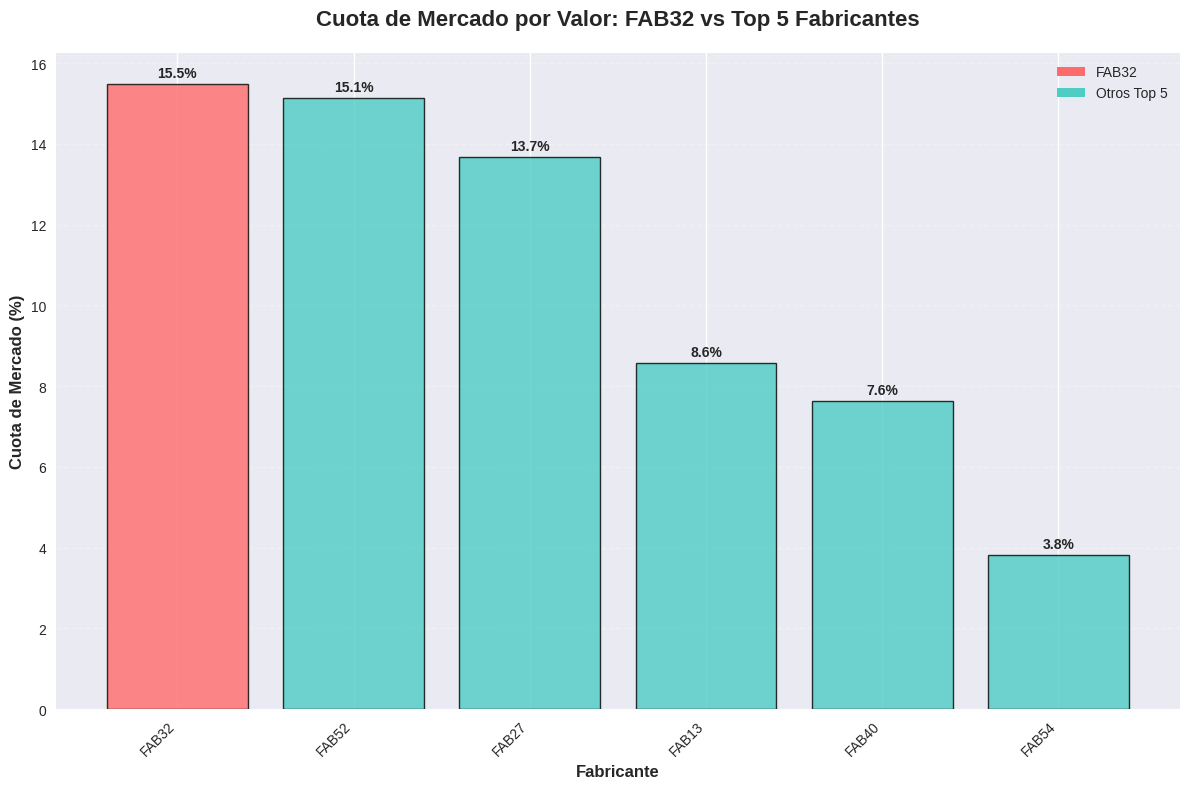

COMPARACIÓN DE CUOTAS DE MERCADO
  FAB  CUOTA_MERCADO_VALOR  CUOTA_MERCADO_UNIDADES
FAB32                15.48                   13.72
FAB52                15.14                   19.78
FAB27                13.67                   13.80
FAB13                 8.58                    8.74
FAB40                 7.64                    7.20
FAB54                 3.82                    4.05


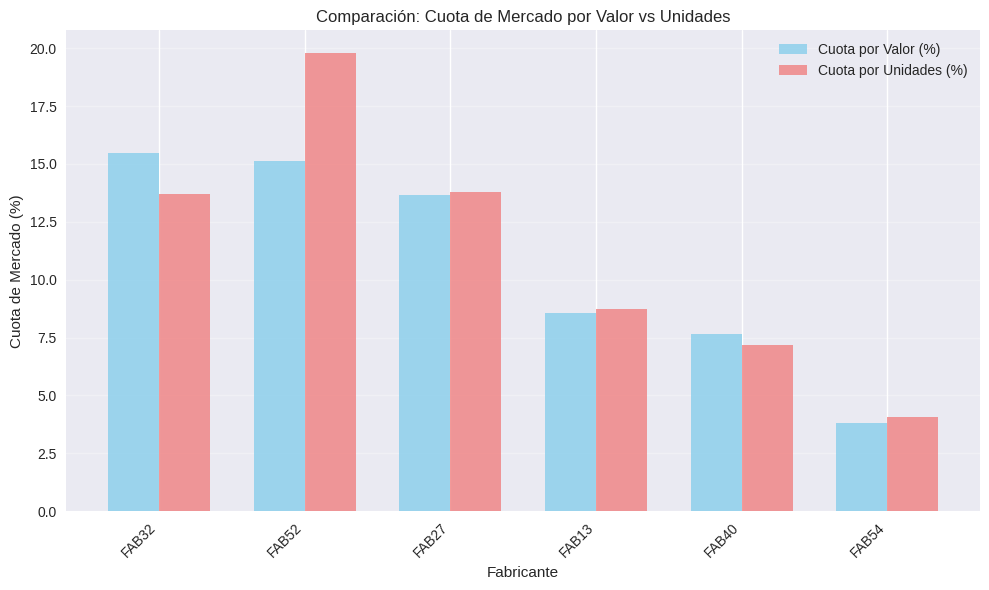

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

datos_grafico = df_fabricante_top.head(6)
plt.figure(figsize=(12, 8))

plt.style.use('seaborn-v0_8')
colors = ['#FF6B6B' if fab == 'FAB32' else '#4ECDC4' for fab in datos_grafico['FAB']]

bars = plt.bar(datos_grafico['FAB'],
               datos_grafico['CUOTA_MERCADO_VALOR'],
               color=colors,
               alpha=0.8,
               edgecolor='black',
               linewidth=1)

plt.title('Cuota de Mercado por Valor: FAB32 vs Top 5 Fabricantes',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Fabricante', fontsize=12, fontweight='bold')
plt.ylabel('Cuota de Mercado (%)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.1f}%',
             ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3, linestyle='--')

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#FF6B6B', label='FAB32'),
                   Patch(facecolor='#4ECDC4', label='Otros Top 5')]
plt.legend(handles=legend_elements, loc='upper right')
plt.tight_layout()
plt.show()

print("COMPARACIÓN DE CUOTAS DE MERCADO")
print("="*50)
print(datos_grafico[['FAB', 'CUOTA_MERCADO_VALOR', 'CUOTA_MERCADO_UNIDADES']].to_string(index=False))

plt.figure(figsize=(10, 6))
x = range(len(datos_grafico))
width = 0.35
plt.bar([i - width/2 for i in x], datos_grafico['CUOTA_MERCADO_VALOR'],
        width, label='Cuota por Valor (%)', color='skyblue', alpha=0.8)
plt.bar([i + width/2 for i in x], datos_grafico['CUOTA_MERCADO_UNIDADES'],
        width, label='Cuota por Unidades (%)', color='lightcoral', alpha=0.8)
plt.xlabel('Fabricante')
plt.ylabel('Cuota de Mercado (%)')
plt.title('Comparación: Cuota de Mercado por Valor vs Unidades')
plt.xticks(x, datos_grafico['FAB'], rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()